<a href="https://colab.research.google.com/github/solomon54/Data-Preprocessing-for-ML-using-Titanic-Dataset/blob/main/DecisionTree2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%%html
<h1>
<marquee style='width: 100%; height:150px; color: orangered; font-size: 5rem; text-Transform: upperCase; background:#25fefe; border-radius:2rem; '>
 <b>Digital-health and mental-wellness</b> Digital Lifestyle Benchmark
 </marquee></h1>
  <img  style="width:100%"
  src='https://storage.googleapis.com/kaggle-datasets-images/8659245/13624561/9979d3180154830d0ed77b8e1d49be2d/dataset-cover.png?t=2025-11-16-14-02-38'/>

#About Dataset
>This dataset examines how digital lifestyles influence mental health outcomes — including anxiety, depression, stress, happiness, focus, and productivity.

>It contains 3,500 synthetic participant records, modeled to reflect realistic behavioral and psychological patterns observed in digital wellbeing research.
With 24 research-inspired features, it offers a strong foundation for predictive modeling, correlation studies, and AI-driven wellbeing insights. 🤖



## **📌 Model Description**

This Model analyzes how digital lifestyle behaviors influence an individual's stress level. Using a dataset of 3,500 synthetic participants, we apply machine learning — specifically a Decision Tree Model — to predict stress levels based on patterns such as screen time, sleep quality, exercise habits, social media use, and digital engagement.

The goal is to:

* understand which digital habits contribute most to stress
* design an interpretable model that explains mental wellness patterns
* evaluate model performance using standard ML metrics

This Model follows a full professional ML workflow, including data preprocessing, exploratory data analysis, feature engineering, model training, evaluation, and interpretation.

---


 .

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

In [11]:
url=('/content/sample_data/Digital-health-and-mental-wellness.csv')
df=pd.read_csv(url)

#**Data Set First Look**

In [ ]:
# Show first 5 rows
df.head()



,id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,...,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,device_type,productivity_score,digital_dependence_score
0,1,40,Female,Asia,High,High School,Part-time/Shift,3.54,45,561,...,3.353627,9.926651,5.0,6.593289,8.0,23.0,0,Android,70.000000,25.700000
1,2,27,Male,Africa,Lower-Mid,Master,Full-time Employee,5.65,100,393,...,2.908147,4.000000,4.0,4.126926,8.1,35.0,0,Laptop,64.000000,30.100000
2,3,31,Male,North America,Lower-Mid,Bachelor,Full-time Employee,8.87,181,231,...,2.889213,4.000000,8.0,1.429139,7.6,15.0,0,Android,65.299301,40.600000
3,4,41,Female,Middle East,Low,Master,Caregiver/Home,4.05,94,268,...,3.097488,7.093357,9.0,4.995512,7.8,28.0,1,Tablet,80.000000,36.684152
4,5,26,Female,Europe,Lower-Mid,Bachelor,Full-time Employee,13.07,199,91,...,2.786098,7.028125,15.0,9.448757,4.2,70.0,1,Android,65.299301,48.400000


In [12]:


# Check shape (rows, columns)
df.shape



(3500, 24)

In [17]:

# (Check column names)
print('Check column names:\n','=='*10)
df.columns



Check column names:


Index(['id', 'age', 'gender', 'region', 'income_level', 'education_level',
       'daily_role', 'device_hours_per_day', 'phone_unlocks',
       'notifications_per_day', 'social_media_mins', 'study_mins',
       'physical_activity_days', 'sleep_hours', 'sleep_quality',
       'anxiety_score', 'depression_score', 'stress_level', 'happiness_score',
       'focus_score', 'high_risk_flag', 'device_type', 'productivity_score',
       'digital_dependence_score'],
      dtype='object')

In [18]:
# Check data types
print('Check data types:\n','=='*5)
df.info()



Check data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        3500 non-null   int64  
 1   age                       3500 non-null   int64  
 2   gender                    3500 non-null   object 
 3   region                    3500 non-null   object 
 4   income_level              3500 non-null   object 
 5   education_level           3500 non-null   object 
 6   daily_role                3500 non-null   object 
 7   device_hours_per_day      3500 non-null   float64
 8   phone_unlocks             3500 non-null   int64  
 9   notifications_per_day     3500 non-null   int64  
 10  social_media_mins         3500 non-null   int64  
 11  study_mins                3500 non-null   int64  
 12  physical_activity_days    3500 non-null   float64
 13  sleep_hours               3500 non-null   flo

In [31]:
# Basic statistical summary
print('Descibe the data set:\n','=='*10)
df.describe()

Descibe the data set:


,id,age,device_hours_per_day,phone_unlocks,notifications_per_day,social_media_mins,study_mins,physical_activity_days,sleep_hours,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,productivity_score,digital_dependence_score
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1750.500000,28.078571,7.317677,147.107429,335.117143,159.362857,108.116571,3.350000,7.254481,2.708848,7.183858,8.830000,5.076560,6.418568,41.598600,0.201429,65.299301,36.684152
std,1010.507298,9.352385,3.239838,67.770656,239.678612,132.748048,79.796273,1.877976,1.291879,1.101105,5.043220,5.738959,3.403503,3.019828,23.764574,0.401125,9.664716,14.115504
min,1.000000,13.000000,0.280000,9.000000,22.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,33.000000,5.600000
25%,875.750000,21.000000,4.867500,96.000000,170.000000,68.000000,42.000000,2.000000,6.410545,1.919438,4.000000,4.000000,1.341488,4.000000,24.750000,0.000000,59.000000,26.200000
50%,1750.500000,27.000000,6.760000,136.000000,268.000000,119.000000,102.000000,3.000000,7.291580,2.907819,6.000000,8.000000,4.809726,7.500000,44.000000,0.000000,65.299301,35.300000
75%,2625.250000,34.000000,9.152500,187.000000,434.000000,204.000000,163.000000,5.000000,8.162298,3.276968,8.845008,13.000000,8.794302,8.900000,59.000000,0.000000,71.000000,45.100000
max,3500.000000,50.000000,17.160000,374.000000,1211.000000,631.000000,418.000000,7.000000,11.004566,5.000000,27.154217,27.000000,10.000000,10.000000,100.000000,1.000000,95.000000,89.200000


# **Dat Cleaning**

In [20]:

# 1. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("-" * 40)

# 2. Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())
print("-" * 40)





Missing values per column:
id                          0
age                         0
gender                      0
region                      0
income_level                0
education_level             0
daily_role                  0
device_hours_per_day        0
phone_unlocks               0
notifications_per_day       0
social_media_mins           0
study_mins                  0
physical_activity_days      0
sleep_hours                 0
sleep_quality               0
anxiety_score               0
depression_score            0
stress_level                0
happiness_score             0
focus_score                 0
high_risk_flag              0
device_type                 0
productivity_score          0
digital_dependence_score    0
dtype: int64
----------------------------------------
Number of duplicate rows: 0
----------------------------------------


In [21]:
# Convert stress_level (continuous) → categories

def stress_category(val):
    if val <= 3:
        return "Low"
    elif val <= 7:
        return "Moderate"
    else:
        return "High"

df["stress_class"] = df["stress_level"].apply(stress_category)


/tmp/ipython-input-3763359600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stress_class', data=df, palette='Set2')


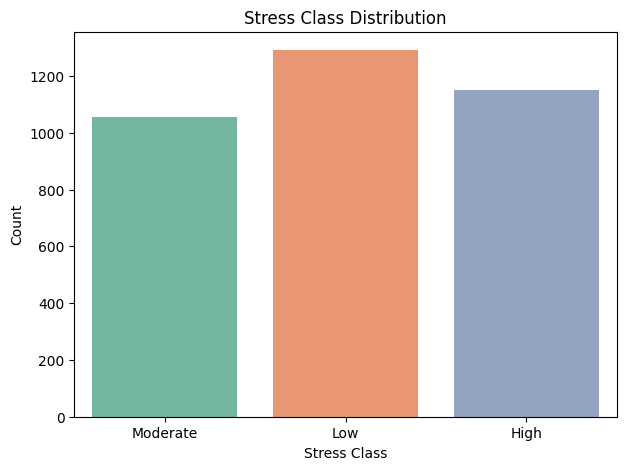

In [35]:
# Visualize distribution of the stress_class target
plt.figure(figsize=(7,5))
sns.countplot(x='stress_class', data=df, palette='Set2')
plt.title("Stress Class Distribution")
plt.xlabel("Stress Class")
plt.ylabel("Count")
plt.show()




## **Label Encoding and Train-Test Split**

In [39]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(df['stress_class'])  # Low->0, Moderate->1, High->2

# Features: Drop 'id', 'stress_class', 'stress_level'
X = df.drop(columns=['id', 'stress_class', 'stress_level'])

# Train/Test Split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Confirm shapes and distribution
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution: {np.bincount(y_train)}")  # shows counts per class
print(f"y_test distribution: {np.bincount(y_test)}")

X_train shape: (2450, 22)
X_test shape: (1050, 22)
y_train distribution: [806 904 740]
y_test distribution: [346 387 317]


# **Decision Tree Model Training -- Entropy**

In [48]:
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=5,
    random_state=42
)

# Convert boolean columns in X_train and X_test to int (0 or 1)
# This handles the case where scikit-learn's check_array might have issues with bool dtypes
for col in X_train.select_dtypes(include='bool').columns:
    X_train[col] = X_train[col].astype(int)
for col in X_test.select_dtypes(include='bool').columns:
    X_test[col] = X_test[col].astype(int)

# Explicitly convert any remaining non-numeric columns in X_train and X_test to numeric,
# coercing errors to NaN and then filling them. This ensures no string columns remain.

for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
        X_test[col] = X_test[col].fillna(0) # Fill NaNs with 0, or another appropriate strategy


# Train
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)


# **Model Evaluation**

In [43]:
# Evaluate model performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Log Loss:", log_loss(y_test, clf.predict_proba(X_test))) # Added log_loss
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.6057142857142858
Log Loss: 1.6038587546251988

Confusion Matrix:
 [[223  31  92]
 [ 29 285  73]
 [ 51 138 128]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.64      0.69       346
           1       0.63      0.74      0.68       387
           2       0.44      0.40      0.42       317

    accuracy                           0.61      1050
   macro avg       0.60      0.59      0.59      1050
weighted avg       0.61      0.61      0.60      1050



# **Decision Tree Visualization**

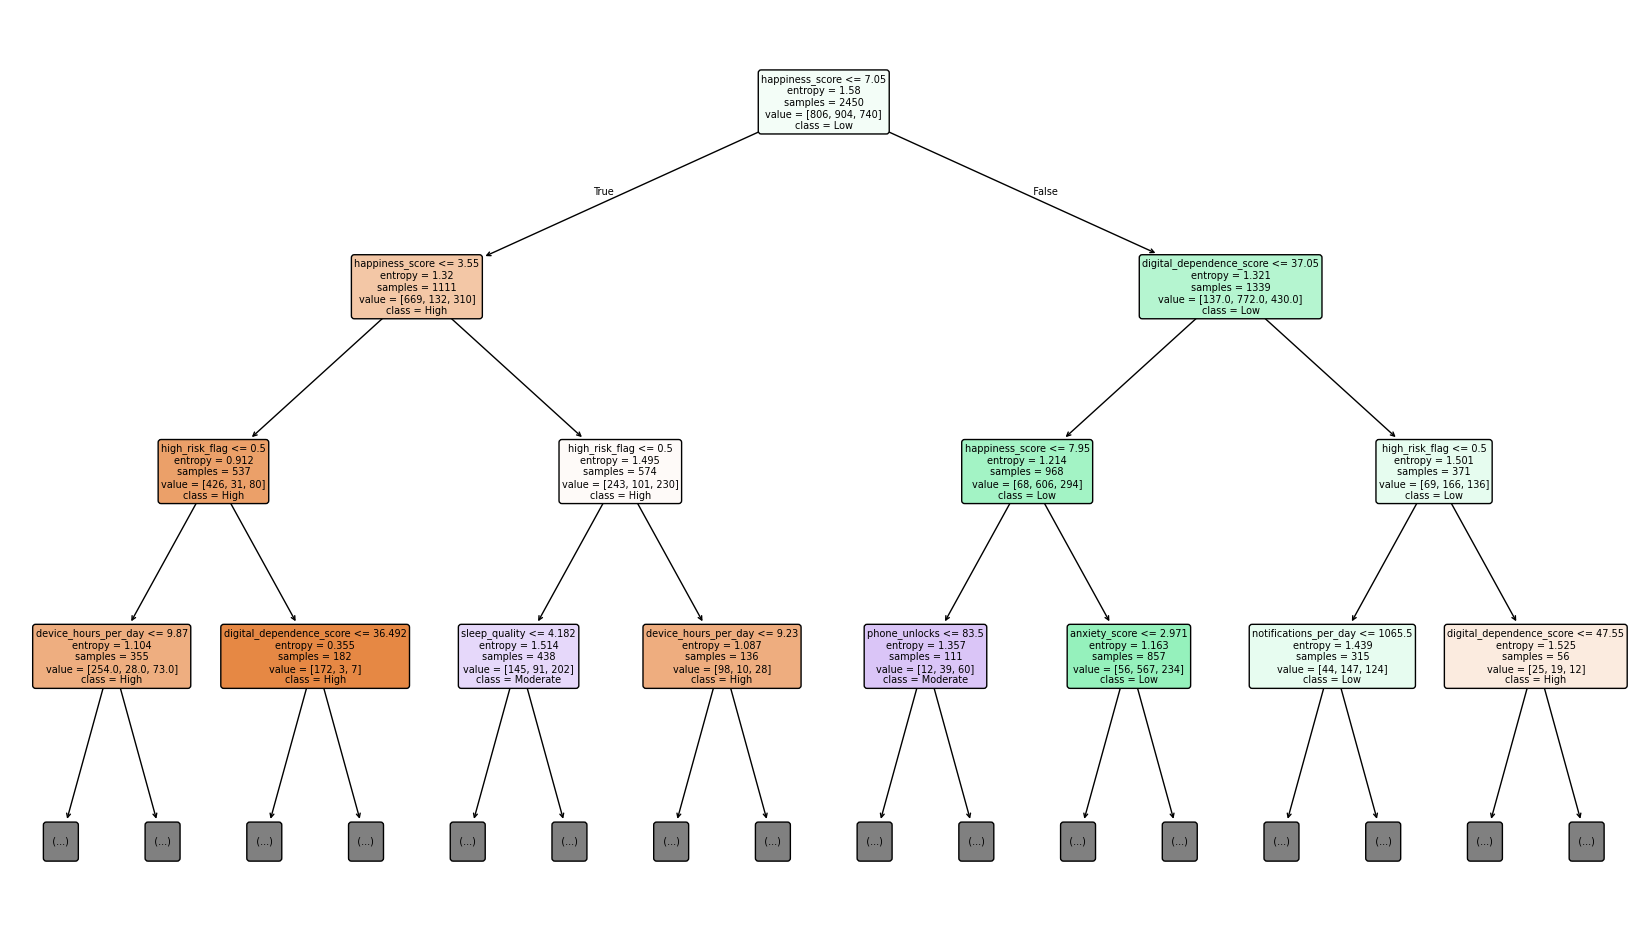

In [49]:
plt.figure(figsize=(21,12))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=7,
    max_depth=3  # only top levels for clarity
)
plt.show()

### **Decision Tree Model Training with Gini Criterion**

Decision Tree Classifier using the `gini` criterion. This will allow us to compare its performance with the `entropy` criterion.

In [46]:
clf_gini = DecisionTreeClassifier(
    criterion='gini', # Minimize Gini Impurity
    max_depth=5,
    min_samples_leaf=5,
    random_state=42
)

# Train the Gini-based model
clf_gini.fit(X_train, y_train)

# Predict with the Gini-based model
y_pred_gini = clf_gini.predict(X_test)

print("Gini-based Decision Tree trained and predictions made.")

Gini-based Decision Tree trained and predictions made.


### **Model Evaluation (Gini Criterion)**

Evaluate the performance of the Decision Tree Classifier trained with the `gini` criterion.

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

# Evaluate Gini-based model performance
print("Accuracy Score (Gini):", accuracy_score(y_test, y_pred_gini))
print("Log Loss (Gini):", log_loss(y_test, clf_gini.predict_proba(X_test)))
print("\nConfusion Matrix (Gini):\n", confusion_matrix(y_test, y_pred_gini))
print("\nClassification Report (Gini):\n", classification_report(y_test, y_pred_gini))

Accuracy Score (Gini): 0.5876190476190476
Log Loss (Gini): 1.2501414812521994

Confusion Matrix (Gini):
 [[225  54  67]
 [ 17 295  75]
 [ 66 154  97]]

Classification Report (Gini):
               precision    recall  f1-score   support

           0       0.73      0.65      0.69       346
           1       0.59      0.76      0.66       387
           2       0.41      0.31      0.35       317

    accuracy                           0.59      1050
   macro avg       0.57      0.57      0.57      1050
weighted avg       0.58      0.59      0.58      1050



### **Decision Tree Visualization (Gini Criterion)**

Visualize the Decision Tree trained with the `gini` criterion to understand its splitting logic.

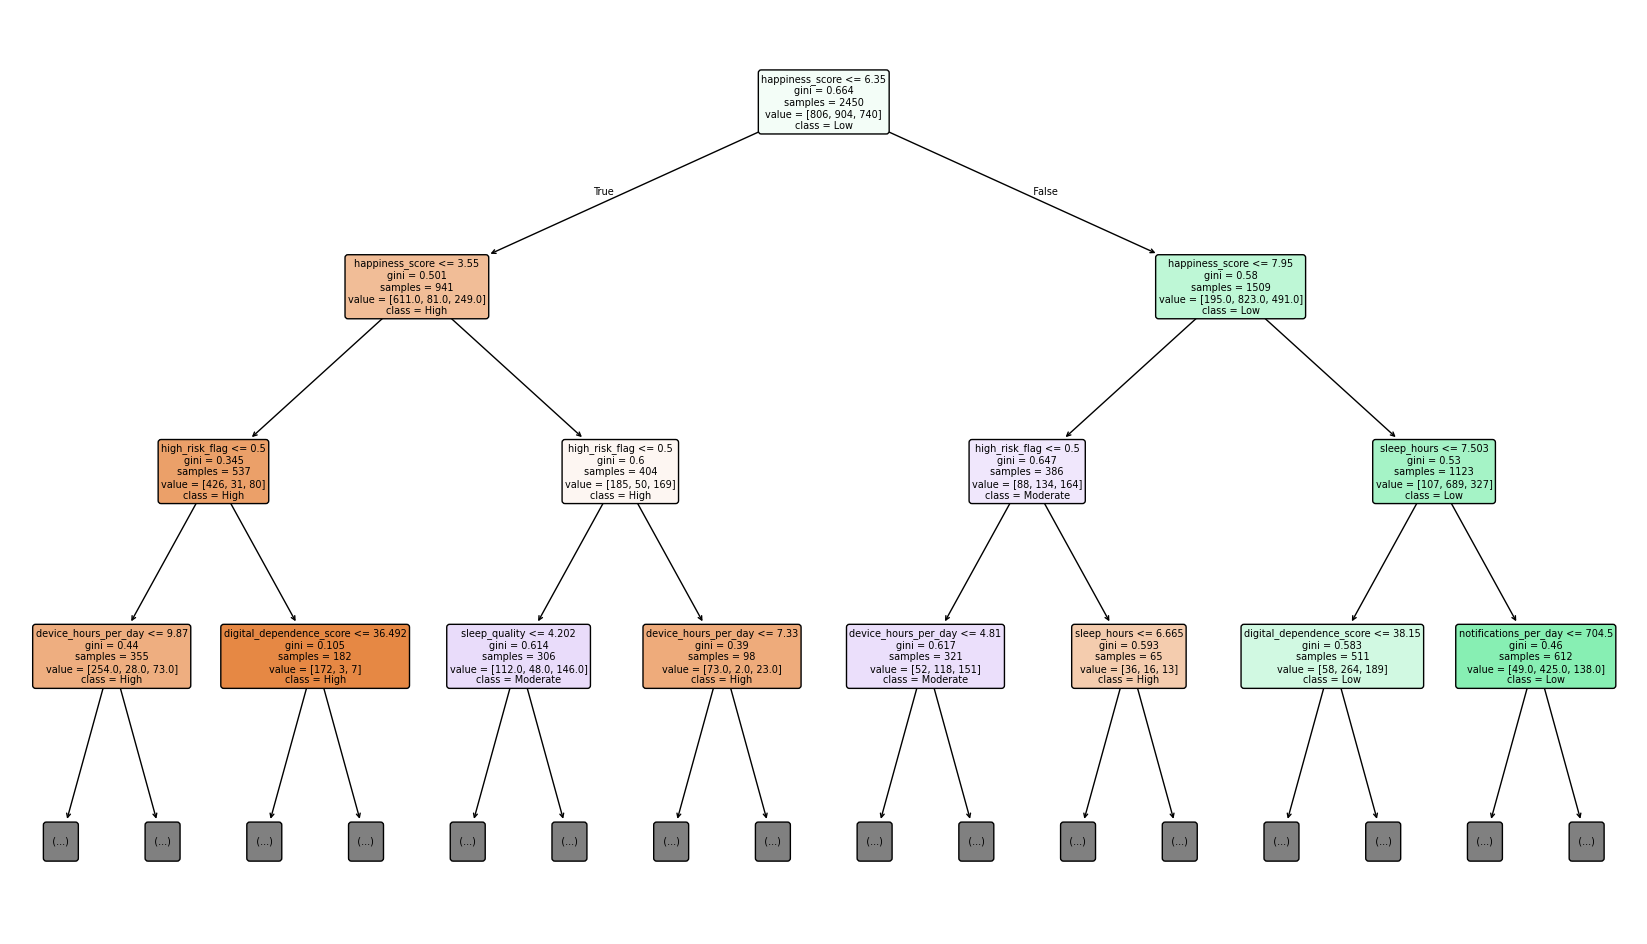

In [50]:
plt.figure(figsize=(21,12))
plot_tree(
    clf_gini,
    feature_names=X.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=7,
    max_depth=3  # only top levels for clarity
)
plt.show()

## **Summary of Analysis: Digital Health and Mental Wellness**

This notebook analyzes how digital lifestyle behaviors influence stress levels using a synthetic dataset of 3,500 participant records. We implemented a machine learning workflow focused on Decision Tree models to predict stress levels (categorized as Low, Moderate, or High).

### **1. Data Overview and Preprocessing:**
- Loaded the dataset containing 24 research-inspired features.
- Performed initial data inspection: `df.head()`, `df.shape`, `df.columns`, `df.info()`, `df.describe()`.
- **Data Cleaning:** Confirmed no missing values and no duplicate rows.
- **Feature Engineering:** Converted the continuous `stress_level` into a categorical `stress_class` (Low, Moderate, High) for classification, based on defined thresholds.
- Visualized the distribution of the new `stress_class` variable using a count plot.

### **2. Data Preparation for Modeling:**
- **Label Encoding:** Transformed the `stress_class` target variable into numerical labels (0, 1, 2) using `LabelEncoder`.
- **Feature Selection:** Dropped irrelevant columns (`id`, `stress_class`, `stress_level`) to create the feature set `X`.
- **Train-Test Split:** Divided the data into training (70%) and testing (30%) sets using `train_test_split`, ensuring `stratify=y` to maintain class distribution across splits.

### **3. Decision Tree Model Training and Evaluation (Entropy Criterion):**
- **Model Training:** Trained a `DecisionTreeClassifier` using the `criterion='entropy'` (which maximizes **information gain** at each split), with `max_depth=5`, `min_samples_leaf=5`, and `random_state=42`.
- **Model Evaluation:** Evaluated the model's performance on the test set (`X_test`, `y_test`):
    - **Accuracy Score:** `0.6057`
    - **Log Loss:** `1.6038`
    - **Confusion Matrix:** Provided insight into correct and incorrect classifications per class.
    - **Classification Report:** Detailed precision, recall, and f1-score for each stress class, highlighting the model's varying performance across classes.
- **Visualization:** Visualized the entropy-based Decision Tree (up to `max_depth=3`) to understand its splitting logic based on feature thresholds.

### **4. Decision Tree Model Training and Evaluation (Gini Criterion):**
- **Model Training:** Trained a second `DecisionTreeClassifier` using the `criterion='gini'` (which minimizes **Gini impurity** at each split), with the same hyperparameters as the entropy model.
- **Model Evaluation:** Evaluated the Gini-based model's performance on the test set:
    - **Accuracy Score:** `0.5876`
    - **Log Loss:** `1.2501`
    - **Confusion Matrix:** Showed classification performance for the Gini model.
    - **Classification Report:** Detailed precision, recall, and f1-score, indicating similar patterns to the entropy model, with struggles in predicting the 'High' stress category.
- **Visualization:** Visualized the Gini-based Decision Tree (up to `max_depth=3`) for structural comparison.

### **5. Model Comparison:**
- The entropy-based model achieved a slightly higher accuracy (`0.6057`) compared to the Gini-based model (`0.5876`).
- The Gini-based model showed a lower Log Loss (`1.2501`) compared to the entropy-based model (`1.6038`), suggesting its probability predictions might be better calibrated.
- Both models demonstrated challenges in accurately predicting the 'High' stress category, as indicated by lower recall and f1-scores for that class.